In [78]:
# Bibliotecas
import pickle

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from src.utils import get_path_projeto

# Diretórios
dir_projeto = get_path_projeto()
dir_staged = dir_projeto / "data/staged"
dir_staged.mkdir(parents=True, exist_ok=True)

# 1. Carregando os dados
path_csv = dir_staged / "dados_empilhados.csv"
config_csv = {
    "sep": "\t",
    "encoding": "utf-8"
}

dataset = pd.read_csv(path_csv, **config_csv)

# 2. Selecionando apenas dados sobre a geração de energia eólica
wind_power_generation = dataset.loc[:, ["interval_start_local", "wind"]]
wind_power_generation.rename(
    columns={"interval_start_local": "date", "wind": "power_generation"},
    inplace=True
)

# 3. Obtendo os valores da coluna de geração de energia
wind_power_generation_values = wind_power_generation["power_generation"].values


# 4. Normalizando os dados
scaler = MinMaxScaler()
wind_power_generation_scaled_values = scaler.fit_transform(wind_power_generation_values.reshape(-1, 1)).ravel()

# 5. Criando os dados de "features" e "target"
window_len = 6  # Número de pontos que existem por meia hora
X = []
y = []

for i in range(len(wind_power_generation_scaled_values) - window_len):
    X.append(wind_power_generation_scaled_values[i:i + window_len])
    y.append(wind_power_generation_scaled_values[i + window_len])

X = np.array(X)
y = np.array(y)

# 6. Dividindo os dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# 7. Salvando para uso futuro
train_test_data = {
    "X": {
        "train": X_train,
        "test": X_test
    },
    "y": {
        "train": y_train,
        "test": y_test
    }
}

with open(dir_staged / "train_test_data.pkl", "wb") as pkl_f:
    pickle.dump(obj=train_test_data, file=pkl_f)

In [67]:
# Bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from src.utils import get_path_projeto

# 1. Carregando os dados
dir_projeto = get_path_projeto()
path_csv = get_path_projeto() / "data/staged/dados_empilhados.csv"
config_csv = {
    "sep": "\t",
    "encoding": "utf-8"
}

dataset = pd.read_csv(path_csv, **config_csv)

# 2. Selecionando apenas dados sobre a geração de energia eólica
wind_power_generation = dataset.loc[:, ["interval_start_local", "wind"]]
wind_power_generation.rename(
    columns={"interval_start_local": "date", "wind": "power_generation"},
    inplace=True
)

wind_power_generation_values = wind_power_generation["power_generation"].values

# # Número de observações
# num_obs = len(wind_power_generation_values)

# Número de pontos que existem por meia hora
window_len = 6

# # Número de linhas com 6 pontos
# num_obs_half_hour = num_obs // window_len

# # Valores a serem descartados (resto da divisão)
# tail = num_obs % window_len

# # Matriz n x 6
# half_hour_values = wind_power_generation_values[:num_obs - tail].reshape((num_obs_half_hour, 6))

# # Tirando a média para cada n
# half_hour_mean = []
# for row in half_hour_values:
#     half_hour_mean.append(np.mean(row))

# Scaler
scaler = MinMaxScaler()
wind_power_generation_scaled_values = scaler.fit_transform(wind_power_generation_values.reshape(-1, 1)).ravel()

X = []
y = []

# for i in range(num_obs_half_hour - window_len):
# X.append(half_hour_mean[i:i+window_len])
# y.append(half_hour_mean[i+window_len])

for i in range(len(wind_power_generation_scaled_values) - window_len):
    X.append(wind_power_generation_scaled_values[i:i + window_len])
    y.append(wind_power_generation_scaled_values[i + window_len])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [66]:
np.array(X).shape

(105390, 6)

In [ ]:
import joblib
from matplotlib import pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

In [75]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(
    scaler.inverse_transform(y_pred.reshape(-1, 1)),
    scaler.inverse_transform(y_test.reshape(-1, 1))
)
print(f"{rmse=}")

rmse=193.91838560971274


In [76]:
np.std(wind_power_generation_values)

1432.9518221254064

In [61]:
X_train[0]

array([0.44836393, 0.45411014, 0.45522745, 0.45889864, 0.46177175,
       0.46560255])

In [62]:
y_train[0]

0.46975259377494005

In [71]:
model.predict(
    np.array([0.44836393, 0.45411014, 0.45522745, 0.45889864, 0.46177175, 0.46560255]).reshape(1, 6)
)

array([0.43361229])

In [33]:
np.std(wind_power_generation_values)

1432.9518221254064

In [34]:
np.std(half_hour_mean)

1431.846492675369

In [ ]:
half_hour_mean

[1031.3333333333333,
 1120.5,
 1169.8333333333333,
 1162.1666666666667,
 1093.0,
 1048.5,
 1075.3333333333333,
 1141.0,
 1239.1666666666667,
 1341.6666666666667,
 1330.6666666666667,
 1308.0,
 1304.1666666666667,
 1284.0,
 1293.1666666666667,
 1290.3333333333333,
 1235.3333333333333,
 1229.3333333333333,
 1245.3333333333333,
 1239.6666666666667,
 1213.1666666666667,
 1232.0,
 1264.0,
 1222.6666666666667,
 1190.5,
 1104.1666666666667,
 1063.0,
 1090.6666666666667,
 1149.3333333333333,
 1236.3333333333333,
 1291.1666666666667,
 1317.6666666666667,
 1348.1666666666667,
 1369.3333333333333,
 1336.1666666666667,
 1305.6666666666667,
 1288.3333333333333,
 1300.1666666666667,
 1292.3333333333333,
 1305.1666666666667,
 1315.8333333333333,
 1316.8333333333333,
 1332.8333333333333,
 1293.5,
 1263.6666666666667,
 1270.5,
 1394.0,
 1425.3333333333333,
 1380.1666666666667,
 1366.5,
 1334.6666666666667,
 1329.1666666666667,
 1210.1666666666667,
 1153.5,
 1243.3333333333333,
 1275.8333333333333,
 122

In [15]:
X[-5:]

[array([3495, 3559, 3639, 3713, 3818, 3882]),
 array([3559, 3639, 3713, 3818, 3882, 3864]),
 array([3639, 3713, 3818, 3882, 3864, 3805]),
 array([3713, 3818, 3882, 3864, 3805, 3787]),
 array([3818, 3882, 3864, 3805, 3787, 3777])]

In [16]:
y[-5:]

[3864, 3805, 3787, 3777, 3754]

/home/alecrim/workspace/alecrim-fiap-tech-challenge-tres/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rmse=197.57806328364836


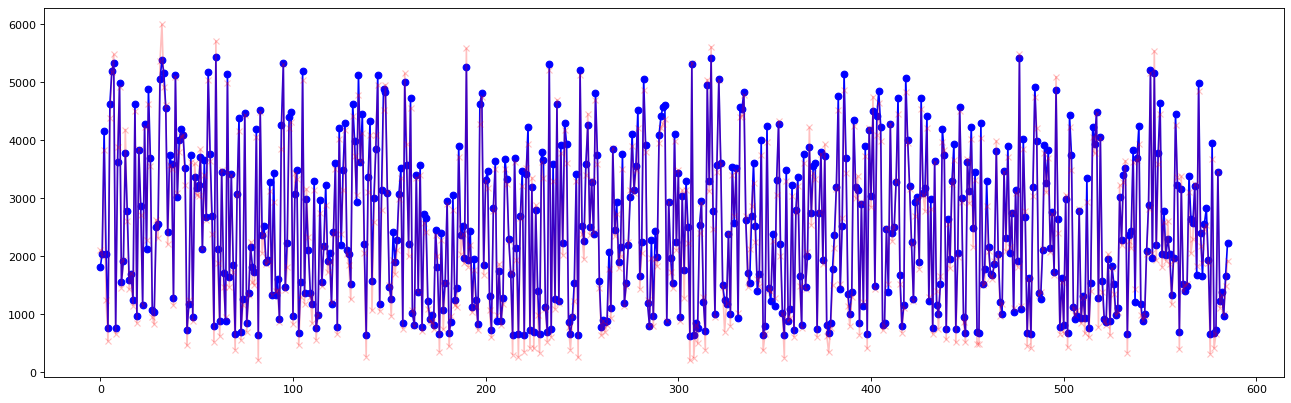

i = 0
a = array([[0.280735]])
b = array([[0.24535135, 0.22508108, 0.21624324, 0.25227027, 0.31308108]])
c = array([[0.24535135, 0.22508108, 0.21624324, 0.25227027, 0.31308108,
        0.280735  ]])

i = 1
a = array([[0.28906835]])
b = array([[0.22508108, 0.21624324, 0.25227027, 0.31308108, 0.280735  ]])
c = array([[0.22508108, 0.21624324, 0.25227027, 0.31308108, 0.280735  ,
        0.28906835]])

i = 2
a = array([[0.29921198]])
b = array([[0.21624324, 0.25227027, 0.31308108, 0.280735  , 0.28906835]])
c = array([[0.21624324, 0.25227027, 0.31308108, 0.280735  , 0.28906835,
        0.29921198]])

i = 3
a = array([[0.30770935]])
b = array([[0.25227027, 0.31308108, 0.280735  , 0.28906835, 0.29921198]])
c = array([[0.25227027, 0.31308108, 0.280735  , 0.28906835, 0.29921198,
        0.30770935]])

i = 4
a = array([[0.31351875]])
b = array([[0.31308108, 0.280735  , 0.28906835, 0.29921198, 0.30770935]])
c = array([[0.31308108, 0.280735  , 0.28906835, 0.29921198, 0.30770935,
        0.31351875]]

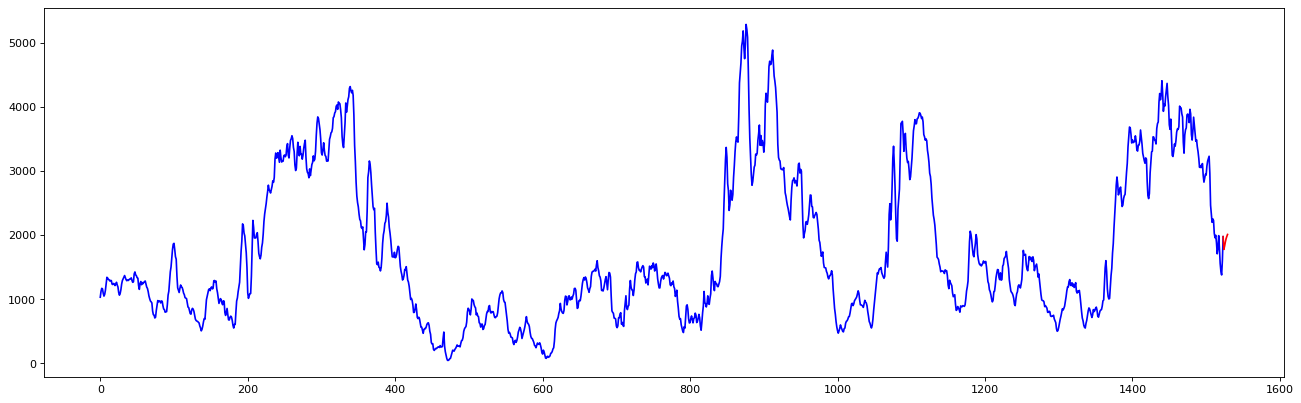

['/home/alecrim/workspace/alecrim-fiap-tech-challenge-tres/models/svr.joblib']

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(
    scaler.inverse_transform(y_pred.reshape(-1, 1)),
    scaler.inverse_transform(y_test)
)
print(f"{rmse=}")

plt.figure(figsize=(20, 6), dpi=80)
plt.plot(scaler.inverse_transform(y_pred.reshape(-1, 1)), marker="o", c="b")
plt.plot(scaler.inverse_transform(y_test), marker="x", c="r", alpha=0.25)
plt.show()

plt.figure(figsize=(20, 6), dpi=80)
num_points = 1_524
x_plot = list(range(num_points))
y_plot = scaler.inverse_transform(X.flatten().reshape(-1, 1))[:num_points]
plt.plot(x_plot, y_plot, c="b")

forsee = []
num_forsee = 6

for i in range(num_forsee):
    print(f"{i = }")

    if i == 0:
        forsee.append(X.flatten().reshape(-1, 1)[:num_points][[-1]])
        a = model.predict(
            X.flatten().reshape(-1, 1)[:num_points][-tamanho_janela:].reshape(1, tamanho_janela)
        ).reshape(-1, 1)
        print(f"{a = }")
        b = X.flatten().reshape(-1, 1)[:num_points][-tamanho_janela:].reshape(1, tamanho_janela)[:, -(tamanho_janela - 1):]
        print(f"{b = }")
        c = np.concatenate((b, a), axis=1)
        print(f"{c = }\n")
        forsee.append(a)
        continue
    a = model.predict(c).reshape(-1, 1)
    print(f"{a = }")
    b = c[[-1], -(tamanho_janela - 1):]
    print(f"{b = }")
    c = np.concatenate((b, a), axis=1)
    print(f"{c = }\n")
    forsee.append(a)

x_plot_forsee = list(range(num_points - 1, num_points + num_forsee))
y_plot_forsee = scaler.inverse_transform(np.array(forsee).flatten().reshape(-1, 1))
plt.plot(x_plot_forsee, y_plot_forsee, c="r")
plt.show()

# Salvando o modelo e o "normalizador"
joblib.dump(scaler, dir_projeto / "models/min_max_scaler.joblib")
joblib.dump(model, dir_projeto / "models/svr.joblib")

# Carregando e usando o modelo

In [13]:
from pprint import pprint

import joblib
import numpy as np

from src.utils import get_path_projeto

# 1. Carregando os dados
dir_projeto = get_path_projeto()

model = joblib.load(dir_projeto / "models/svr.joblib")
scaler = joblib.load(dir_projeto / "models/min_max_scaler.joblib")


def predict_meia_hora(x):
    x_scaled = scaler.transform(x).reshape(1, 6)

    forsee = np.array(x_scaled[0, -1]).ravel()
    num_points = 6
    num_forsee = 6
    tamanho_janela = 6

    for i in range(num_forsee):
        if i == 0:
            a = model.predict(x_scaled).reshape(-1, 1)
            b = x_scaled[:num_points][-tamanho_janela:].reshape(1, tamanho_janela)[:, -(tamanho_janela - 1):]
            c = np.concatenate((b, a), axis=1)
            forsee = np.concatenate((forsee, a.ravel()))
            continue
        a = model.predict(c).reshape(-1, 1)
        b = c[[-1], -(tamanho_janela - 1):]
        c = np.concatenate((b, a), axis=1)
        forsee = np.concatenate((forsee, a.ravel()))

    forsee = np.vectorize(lambda x: scaler.inverse_transform(np.array(x).reshape(-1, 1)))(forsee)

    return forsee


teste = np.array([2300, 2350, 2400, 2380, 2420, 2460]).reshape(-1, 1)
prox_meia_hora = predict_meia_hora(teste)
pprint(prox_meia_hora)

array([2460.        , 2510.51378218, 2550.30599271, 2591.76033234,
       2635.81106004, 2678.8713881 , 2721.94632213])


In [ ]:
prox_meia_hora

0.3915945945945946

In [12]:
np.vectorize(lambda x: scaler.inverse_transform(np.array(x).reshape(-1, 1)))(prox_meia_hora)

array([2460.        , 2510.51378218, 2550.30599271, 2591.76033234,
       2635.81106004, 2678.8713881 , 2721.94632213])